In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_csv(os.path.join(r'C:\Users\anika\New York Airbnb\Data\Prepared Data\Task 6.2.csv'))

In [10]:
df.head()

,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
df.describe()

,Unnamed: 0,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48816.000000,4.881600e+04,48816.000000,48816.000000,48816.000000,48816.000000,48816.000000,48816.000000,48816.000000,48816.000000
mean,24407.500000,6.765738e+07,40.728940,-73.952155,152.637004,6.630326,23.288205,1.091891,7.153003,112.682338
std,14092.109707,7.863341e+07,0.054529,0.046163,239.935784,13.955268,44.565486,1.597708,32.978290,131.536146
min,0.000000,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,12203.750000,7.829861e+06,40.690080,-73.983060,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,24407.500000,3.081175e+07,40.723060,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,36611.250000,1.074344e+08,40.763120,-73.936252,175.000000,5.000000,24.000000,1.590000,2.000000,226.000000
max,48815.000000,2.743213e+08,40.913060,-73.712990,10000.000000,364.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#Check for missing values
df.isnull().sum()

Unnamed: 0                        0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
# Remove unrealistic prices (e.g., price = 0 or super high)
df = df[(df['price'] > 0) & (df['price'] < 1000)]

In [13]:
df.describe()

,Unnamed: 0,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48510.000000,4.851000e+04,48510.000000,48510.000000,48510.000000,48510.000000,48510.000000,48510.000000,48510.000000,48510.000000
mean,24412.343084,6.767294e+07,40.728919,-73.952013,140.266213,6.594826,23.385549,1.096245,7.177427,112.273717
std,14087.152424,7.862788e+07,0.054577,0.046164,112.923500,13.843833,44.665672,1.600283,33.071115,131.302996
min,0.000000,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,12217.250000,7.831604e+06,40.689993,-73.982930,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,24404.500000,3.086969e+07,40.722950,-73.955570,105.000000,3.000000,5.000000,0.380000,1.000000,44.000000
75%,36604.750000,1.074344e+08,40.763130,-73.936082,175.000000,5.000000,24.000000,1.600000,2.000000,225.000000
max,48815.000000,2.743213e+08,40.913060,-73.712990,999.000000,364.000000,629.000000,58.500000,327.000000,365.000000


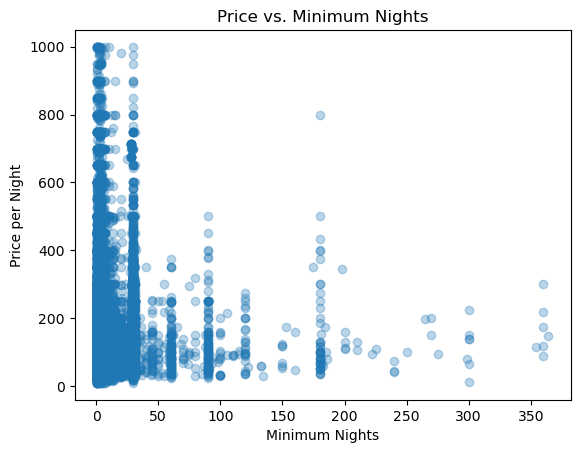

In [14]:
#Visualize Relationship
plt.scatter(df['minimum_nights'], df['price'], alpha=0.3)
plt.xlabel('Minimum Nights')
plt.ylabel('Price per Night')
plt.title('Price vs. Minimum Nights')
plt.show()

In [22]:
##Hypothesis: The fewer the minimum nights required, the higher the price per night.

In [23]:
#shape the data for scikit‑learn
X = df['minimum_nights'].values.reshape(-1, 1) 
y = df['price'].values 

In [17]:
#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [18]:
#Build and train the model
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
#Predict on the held‑out test set
y_predicted = regression.predict(X_test)

In [24]:
#Evaluate
mse  = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_predicted)

print(f"Slope (coefficient): {regression.coef_[0]:.4f}")
print(f"Intercept:          {regression.intercept_:.2f}")
print(f"RMSE:               {rmse:.2f}")
print(f"R² score:           {r2:.3f}")

Slope (coefficient): 0.2250
Intercept:          138.19
RMSE:               115.40
R² score:           0.000


In [25]:
# This suggests that for each additional required minimum night, the price increases by approximately $0.23. This effect is minimal and likely not practically significant.
# The model estimates that if a listing had a minimum night requirement of zero (hypothetically), the price would be approximately $138.19.
# model’s predicted prices deviate from the actual prices by approximately $115.40. This is a substantial error considering typical nightly rates, indicating poor predictive performance.
#R² value of 0.000 suggests that the linear relationship between "minimum_nights" and "price" is essentially nonexistent.

In [27]:
#model performance statistics

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 115.40
R² Score: 0.000


In [29]:
#compare real and predicted values of y
data_1=pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_predicted.flatten()})
data_1.head(10)

,Actual,Predicted
0,65,139.316720
1,225,140.441914
2,300,138.866642
3,59,139.091681
4,350,138.641603
5,70,138.641603
6,85,138.641603
7,350,139.316720
8,40,138.641603
9,126,138.416564


In [31]:
#Hypothesis:How does the geographic distribution (latitude/longitude) affect pricing and reviews across neighborhood groups? 

In [38]:
#shape the data for scikit‑learn
X = df['latitude'].values.reshape(-1, 1)   # Independent variable
y = df['price'].values                    # Dependent variable


In [39]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [41]:
#Predict on the held‑out test set
y_predicted = regression.predict(X_test)

In [42]:
#Evaluate
mse  = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_predicted)

print(f"Slope (coefficient): {regression.coef_[0]:.4f}")
print(f"Intercept:          {regression.intercept_:.2f}")
print(f"RMSE:               {rmse:.2f}")
print(f"R² score:           {r2:.3f}")

Slope (coefficient): 133.2475
Intercept:          -5287.33
RMSE:               115.20
R² score:           0.003


In [43]:
#model performance statistics

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 115.20
R² Score: 0.003


In [44]:
#compare real and predicted values of y
data_2=pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_predicted.flatten()})
data_2.head(10)

,Actual,Predicted
0,65,144.545844
1,225,138.268557
2,300,137.090649
3,59,134.067265
4,350,138.654974
5,70,134.552285
6,85,131.598189
7,350,133.915362
8,40,135.591615
9,126,144.745715


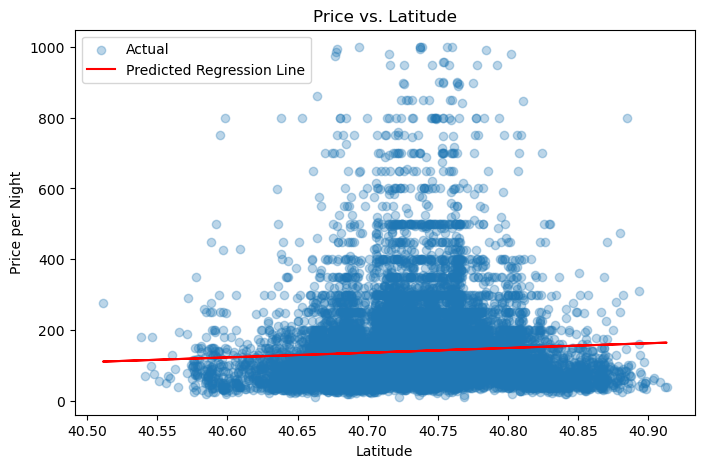

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.3, label='Actual')
plt.plot(X_test, y_predicted, color='red', label='Predicted Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Price per Night')
plt.title('Price vs. Latitude')
plt.legend()
plt.show()

In [ ]:
##Final Evaluation
#R² ≈ 0.003 → Latitude explains 0.3 % of price variation — effectively none.
#RMSE ≈ $115/night → Average prediction error is $115, far too large to be useful.
#Visual check → Points are widely scattered around the red line; the trend is almost flat.

In [51]:
##Bias
#Using only latitude ignores east‑west location (longitude) and neighborhood boundaries where prices differ sharply.
#Snapshot from 2019; post‑COVID market shifts and seasonal price swings aren’t captured.
#Price outliers – Luxury or ultra‑budget listings can skew averages and inflate RMSE even after basic filtering.